<a href="https://colab.research.google.com/github/Svendpasak/Capstone-Project-SP/blob/master/BNB_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Tahap Preprocessing
import keras
import math
import pandas as pd
import numpy as np
import tensorflow as tf
import random as set_random_seed
from sklearn.preprocessing import MinMaxScaler
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
from keras.models import sequential
from keras.layers import Dense,LSTM, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model
from tensorflow.python.keras import Sequential
plt.style.use("fivethirtyeight")

In [34]:
from google.colab import files
uploaded = files.upload()

Saving BNB-USD.csv to BNB-USD.csv


In [35]:
df = pd.read_csv("data set BNB-USD.csv",  index_col=0)
df.head(6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,2.05314,2.17423,1.89394,1.99077,1.99077,19192200
2017-11-10,2.00773,2.06947,1.64478,1.79684,1.79684,11155000
2017-11-11,1.78628,1.91775,1.61429,1.67047,1.67047,8178150
2017-11-12,1.66889,1.67280,1.46256,1.51969,1.51969,15298700
2017-11-13,1.52601,1.73502,1.51760,1.68662,1.68662,12238800
2017-11-14,1.68928,1.73537,1.56827,1.59258,1.59258,7829600


In [36]:
df.shape

(1330, 6)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1330 entries, 2017-11-09 to 2021-06-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1330 non-null   float64
 1   High       1330 non-null   float64
 2   Low        1330 non-null   float64
 3   Close      1330 non-null   float64
 4   Adj Close  1330 non-null   float64
 5   Volume     1330 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 72.7+ KB


In [38]:
# Tahap Data Cleaning (Missing Value)
BNB = df.fillna(0)
BNB.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-26,281.133942,289.949799,264.601013,279.438049,279.438049,1921847994
2021-06-27,279.865295,291.148926,270.289917,290.567017,290.567017,1521388056
2021-06-28,290.818695,298.720612,283.951843,289.534119,289.534119,1722578691
2021-06-29,289.919128,315.439331,289.221161,300.211548,300.211548,1946428384
2021-06-30,300.958801,304.801361,281.778015,303.295868,303.295868,1903538448


In [39]:
# Pengecekan data Missing Value
BNB.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0, 0.5, 'Close Price')

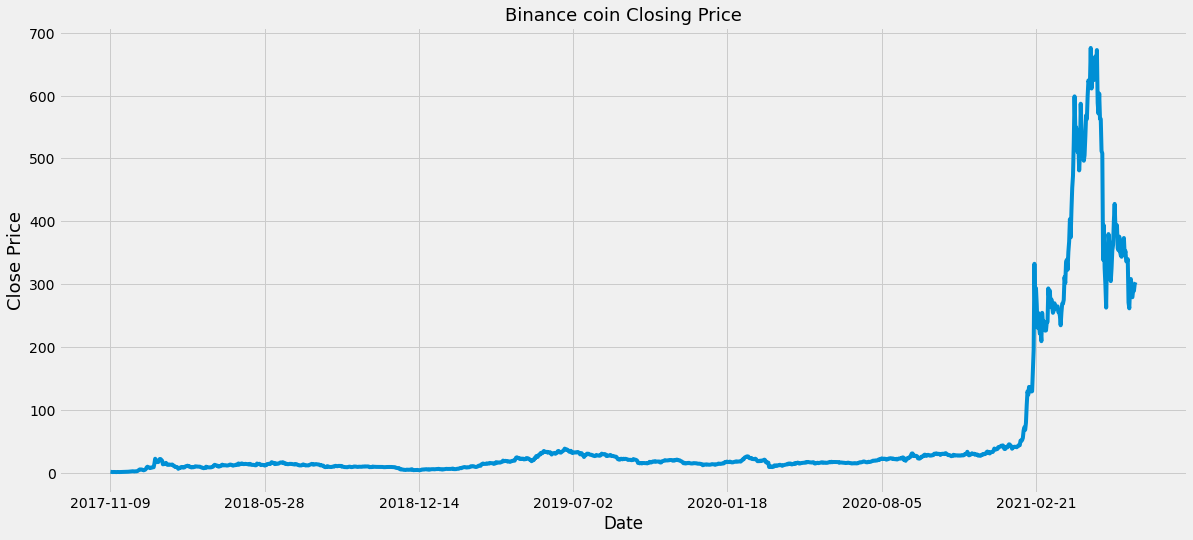

In [40]:
# Visualize the Closing Price
BNB["Close"].plot(figsize=(18,8))
plt.title("Binance coin Closing Price", fontsize = 18)
plt.ylabel("Close Price", fontsize = 18)

In [41]:
# Create a new dataframe with only the "Close" cloumn
BNB = BNB.filter(["Close"])
# Convert the dataframe to a numpy array
BNB1 = BNB.values
# Get the number of Rows to train the model on
training_data_len = math.ceil(len(BNB1)*.80)
training_data_len

1064

In [42]:
# Scale the Data for Normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(BNB1)
scaled_data

array([[7.12590812e-04],
       [4.24934984e-04],
       [2.37490716e-04],
       ...,
       [4.27224838e-01],
       [4.43062638e-01],
       [4.47637602e-01]])

In [43]:
# Create the training data set
# create the scaled training data set
train_data = scaled_data[0: training_data_len, :]
# Split the Data into x_train and y_train data set
x_train = []
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])
    if i <=  31:
        print(x_train)
        print(y_train)
        print()  

[array([7.12590812e-04, 4.24934984e-04, 2.37490716e-04, 1.38391630e-05,
       2.61445966e-04, 1.21956696e-04, 2.97994409e-05, 1.00211559e-04,
       0.00000000e+00, 2.43216243e-04, 1.53387764e-04, 1.69229379e-04,
       9.44860322e-05, 1.50391504e-04, 5.68696150e-05, 3.07561676e-04,
       5.39193368e-04, 5.08429784e-04, 6.41704038e-04, 6.03331140e-04,
       3.57726788e-04, 7.21787255e-04, 8.30453608e-04, 8.51115938e-04,
       1.06336094e-03, 1.45558922e-03, 1.60928847e-03, 1.59800058e-03,
       1.88317930e-03, 1.95841214e-03])]
[0.0016317307603395436]

[array([7.12590812e-04, 4.24934984e-04, 2.37490716e-04, 1.38391630e-05,
       2.61445966e-04, 1.21956696e-04, 2.97994409e-05, 1.00211559e-04,
       0.00000000e+00, 2.43216243e-04, 1.53387764e-04, 1.69229379e-04,
       9.44860322e-05, 1.50391504e-04, 5.68696150e-05, 3.07561676e-04,
       5.39193368e-04, 5.08429784e-04, 6.41704038e-04, 6.03331140e-04,
       3.57726788e-04, 7.21787255e-04, 8.30453608e-04, 8.51115938e-04,
       1.

In [44]:
# Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train), np.array(y_train)

In [45]:
# Reshape the Data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1034, 30, 1)

In [46]:
# Build the Model
model = keras.Sequential()
model.add(layers.LSTM(50,return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(layers.LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(layers.LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(layers.LSTM(50,return_sequences=False))
model.add(Dropout(0.2))
model.add(layers.Dense(1))

In [48]:
# Compile the Model
model.compile(optimizer="adam", loss="mean_squared_error")

In [49]:
# Fitting / Train the Model
model.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
33/33 [==============================] - 9s 65ms/step - loss: 1.5311e-04
Epoch 2/100
33/33 [==============================] - 2s 65ms/step - loss: 4.1013e-05
Epoch 3/100
33/33 [==============================] - 2s 64ms/step - loss: 2.7222e-05
Epoch 4/100
33/33 [==============================] - 2s 65ms/step - loss: 2.7355e-05
Epoch 5/100
33/33 [==============================] - 2s 64ms/step - loss: 2.3603e-05
Epoch 6/100
33/33 [==============================] - 2s 64ms/step - loss: 2.1074e-05
Epoch 7/100
33/33 [==============================] - 2s 64ms/step - loss: 2.3111e-05
Epoch 8/100
33/33 [==============================] - 2s 63ms/step - loss: 1.8211e-05
Epoch 9/100
33/33 [==============================] - 2s 64ms/step - loss: 2.3331e-05
Epoch 10/100
33/33 [==============================] - 2s 63ms/step - loss: 1.7744e-05
Epoch 11/100
33/33 [==============================] - 2s 63ms/step - loss: 1.7884e-05
Epoch 12/100
33/33 [==============================] - 2s 63ms/s

In [50]:
# Create the testing data set
# Create a new array containing scale values from index .... to the end of data set
test_data = scaled_data[training_data_len-30:,:]

In [51]:
# Created the data set x_test and y_test
x_test = []
y_test = BNB1[training_data_len:,:]#---rest of the data
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [52]:
# Convert the Data to a numpy array
x_test = np.array(x_test)

In [53]:
# Reshape the Data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [54]:
# Get the model predicted price values / Denormalize
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [60]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, predictions)*100
print(MAPE)

8.310787802791857


In [61]:
# Plot the Data
train = BNB[:training_data_len]
valid = BNB[training_data_len:]
valid["predictions"] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


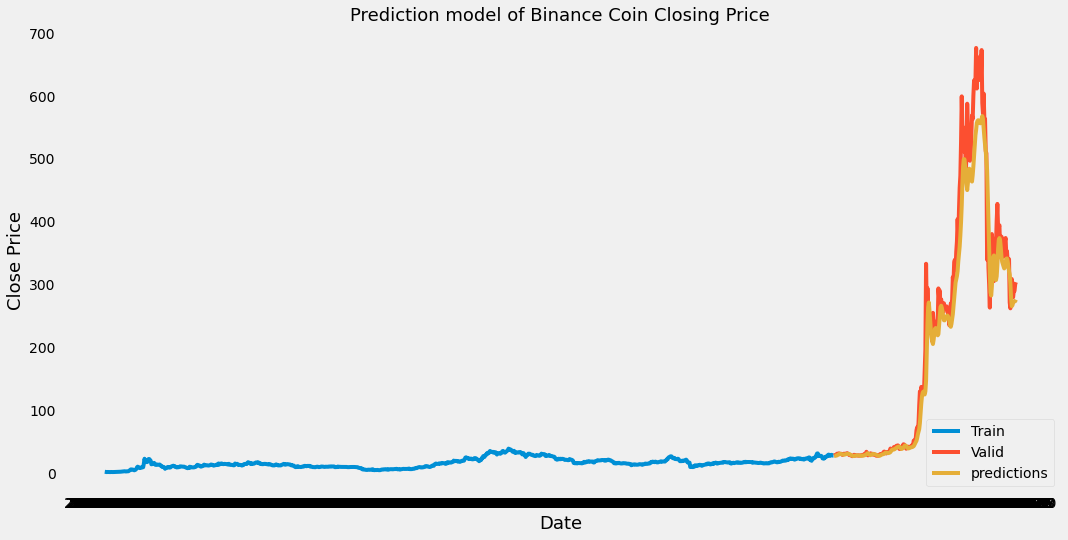

In [62]:
# Visualize the Data
plt.figure(figsize=(16,8))
plt.title("Prediction model of Binance Coin Closing Price", fontsize=18)
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Close Price", fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid[["Close","predictions"]])
plt.legend(["Train","Valid","predictions"],loc="lower right")
plt.grid()
plt.show()


In [27]:
#Show The Valid and Predicted Prices
valid[["Close" , "predictions"]]

,Close,predictions
1131,30.029577,27.429430
1132,29.547283,28.051912
1133,30.490194,28.692848
1134,30.184134,29.270323
1135,30.938360,29.649109
...,...,...
1325,279.438049,281.930634
1326,290.567017,283.299713
1327,289.534119,284.824554
1328,300.211548,286.343567


In [58]:
valid2 = valid[["Close" , "predictions"]]
valid2.head(20)

,Close,predictions
Date,,
2020-10-08,27.705311,27.741735
2020-10-09,28.445030,27.555660
2020-10-10,28.312487,27.589203
2020-10-11,28.555580,27.765490
2020-10-12,30.714682,28.000982
2020-10-13,30.706745,28.663042
2020-10-14,30.912119,29.484041
2020-10-15,31.295864,30.157164
2020-10-16,29.994900,30.608459


In [59]:
# Get the RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

18.87012839408106